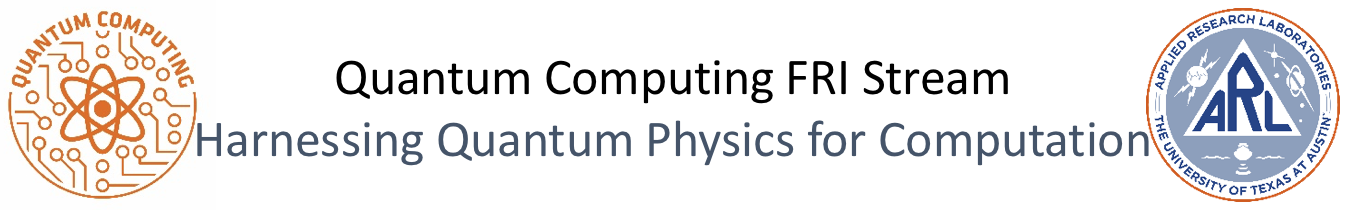

# Programming Qiskit
## Lesson 4

## Installations and Imports

In [2]:
%pip install qiskit
%pip install qiskit-aer

#You may need to restart the runtime for this change to take effect
%pip install pylatexenc
%pip install qiskit_ibm_runtime

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.primitives import Sampler, StatevectorSampler, Estimator, StatevectorEstimator
import numpy as np

sampler = StatevectorSampler()
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2 as Sampler

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Today's Objectives

- Review available gates in Qiskit
- Build general single- and multi-qubit gates with Qiskit

## Single Qubit Operations

A general sigle-qubit unitary can be written in the following form:

$$
\mathbf{U} = \begin{pmatrix} \cos\frac{\theta}{2} & -e^{i\lambda} \sin\frac{\theta}{2} \\ e^{i\phi} \sin\frac{\theta}{2} & e^{i(\lambda+\phi)} \cos\frac{\theta}{2} \end{pmatrix} = \mathbf{U}(\theta,\phi,\lambda)
$$

### Constructing Single-Qubit Gates

#### Hardware Primitives

The particular implementation of gates on real quantum computers is highly dependent on the hardware.

While Qiskit can be compiled to run on a variety of hardware types, it is particularly fit to work for IBM's superconducting transmon quantum computers.

Qiskit's lower level gates support this point of view.


$$\text{qc.p}(\lambda,\text{q[0]})= \mathbf{U}_{0}(0,0,\lambda)$$

$$\text{The p gate (phase gate) works by allowing the qubit's phase to precess for the specified amount of time.} \\
\text{ This equates to a rotation around the Z-axis of the Bloch sphere. Effectively, we allow the natural oscillation to transform the state for us!} \\ \text{Note that in some places in the Qiskit documentation, the phase may be referred to as }\phi\text{ rather than }\lambda .$$

$$\text{qc.sx}(\text{q[0]})= \sqrt{\mathbf{X}_{0}} = \frac{1}{2}\begin{pmatrix} 1+i & 1-i \\ 1-i & 1+i \end{pmatrix}$$

$$\text{The sx gate is implemented through a single microwave pulse to rotate the state by an angle of }\frac{\pi}{2}\text{ in the Bloch sphere.}\\ \text{Other single-qubit gates are created by combining sx-type pulses with p-type phase precessions.}$$

##### Older Methods

These particular methods are now deprecated, but they can be instructional as examples

$$\text{qc.u3}(\theta,\phi,\lambda,\text{q[0]}) = \mathbf{U}_{0}(\theta,\phi,\lambda) = \text{qc.p(}\phi+\pi,\text{q[0]})\;\text{qc.sx(q[0]})\;\text{qc.p(}\theta+\pi,\text{q[0]})\;\text{qc.sx(q[0]})\;\text{qc.p(}\lambda,\text{q[0]})$$

$$\text{The u gate is implemented on the hardware using two microwave pulses to align the qubit to affect the }\theta\text{ and }\phi\text{ rotations.}$$
$$\text{The actual rotations are implemented as time delays while the inherent oscillation of the qubit changes the state.}$$

$$\text{qc.u2}(\phi,\lambda,\text{q[0]}) = \mathbf{U}_{0}(\pi/2,\phi,\lambda)$$

$$\text{This gate uses a single microwave pulse for the }\phi \text{ rotation.}$$

$$\text{qc.u1}(\lambda,\text{q[0]}) = \mathbf{U}_{0}(0,0,\lambda)$$

$$\text{This gate simply allows the qubit to precess until it has acquired a phase of }\lambda.$$

In [2]:

from qiskit import QuantumCircuit
import numpy as np

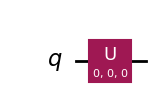

In [3]:
qc = QuantumCircuit(1)
qc.u(0,0,0,0)
qc.draw('mpl')

##### A General Unitary

In place of the unitary gates above, you can use __QuantumCircuit.u__ to construct some general unitary gate!

$$\text{qc.u}(\theta,\phi,\lambda,\text{q[0]}) = \mathbf{U}_{0}(\theta,\phi,\lambda)$$

$$\text{This takes the place of the QuantumCircuit.u3 method. You can use appropriate arguements to make u2 or u1.}$$

#### More single-qubit gates

Rotations (on the Bloch sphere) around each of the axes
$$\begin{align} \text{qc.rx(}\theta\text{,q[0])} &= \mathbf{U}_{0}\left(\theta,\frac{-\pi}{2},\frac{-\pi}{2}\right) \\
\text{qc.ry(}\theta\text{,q[0])} &= \mathbf{U}_{0}\left(\theta,0,0\right)\\
\text{qc.rz(}\lambda\text{,q[0])} &= \mathbf{U}_{0}\left(0,0,\lambda\right)
\end{align}
$$

And the rest of the gang:
$$\begin{align} \text{qc.i(q[0])}\qquad&\mathbf{I}_{0}\\
\text{qc.x(q[0])}\qquad&\mathbf{X}_{0}\\
\text{qc.y(q[0])}\qquad&\mathbf{Y}_{0}\\
\text{qc.z(q[0])}\qquad&\mathbf{Z}_{0}\\
\text{qc.s(q[0])}\qquad&\mathbf{S}_{0}=\sqrt{\mathbf{Z}_{0}}\\
\text{qc.sdg(q[0])}\qquad&\mathbf{S}^{\dagger}_{0}\\
\text{qc.t(q[0])}\qquad&\mathbf{T}_{0}=\sqrt{\mathbf{S}_{0}}\\
\text{qc.tdg(q[0])}\qquad&\mathbf{T}^{\dagger}_{0}
\end{align}
$$

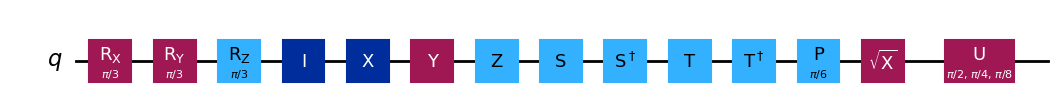

In [6]:
qc = QuantumCircuit(1)
qc.rx(np.pi/3,0)
qc.ry(np.pi/3,0)
qc.rz(np.pi/3,0)
qc.id(0)
qc.x(0)
qc.y(0)
qc.z(0)
qc.s(0)
qc.sdg(0)
qc.t(0)
qc.tdg(0)
qc.p(np.pi/6,0)
qc.sx(0)
qc.u(np.pi/2,np.pi/4,np.pi/8,0)

qc.draw('mpl')

### <font color=green> Exercise: Building Single-Qubit Gates </font>

$$\mathbf{U} = \begin{pmatrix} \cos\frac{\theta}{2} & -e^{i\lambda} \sin\frac{\theta}{2} \\ e^{i\phi} \sin\frac{\theta}{2} & e^{i(\lambda+\phi)} \cos\frac{\theta}{2} \end{pmatrix} \qquad \theta \in [0,\pi] \quad \phi,\lambda \in [0,2\pi)$$


Use only the primitive gate qc.u to implement the gates below. Compare your results to the built-in gates.

$$\mathbf{X}=\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \qquad \mathbf{H}=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \qquad \mathbf{Z}=\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$



$$\text{For example}\quad\mathbf{I}_{0}=\mathbf{U}_{0}(0,0,0)=\text{qc.u(0,0,0,q[0])}$$

A framework for your comparisons is provided. Add the appropriate unitary gates.

In [3]:
%pip install seaborn
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector, plot_bloch_vector

Note: you may need to restart the kernel to use updated packages.


[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


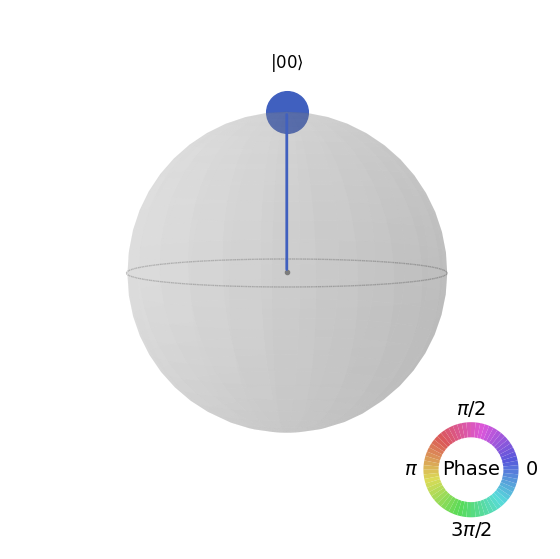

In [7]:
v1=Statevector.from_label('00')
print(v1.data)
plot_bloch_multivector(v1.data)
plot_state_qsphere(v1.data)

<font color=green> Compare to X </font>

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


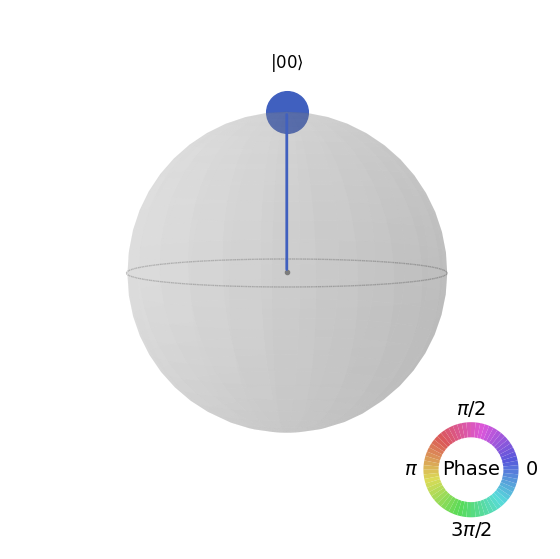

In [5]:
qc=QuantumCircuit(2)
qc.h(0)
qc.z(1)
vec=v1.evolve(qc)
print(vec.data)
plot_bloch_multivector(vec.data)
plot_state_qsphere(v1.data)

[6.123234e-17+0.j 1.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j]


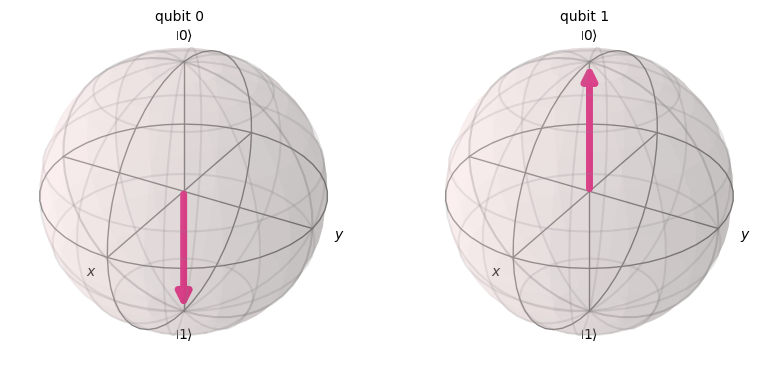

In [6]:
qc=QuantumCircuit(1)
# ~~~~~ YOUR X CODE HERE
qc.u(np.pi, 0, 0, 0)
# -----

vec=v1.evolve(qc)
print(vec.data)
plot_bloch_multivector(vec.data)

<font color=green> Compare to H </font>

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


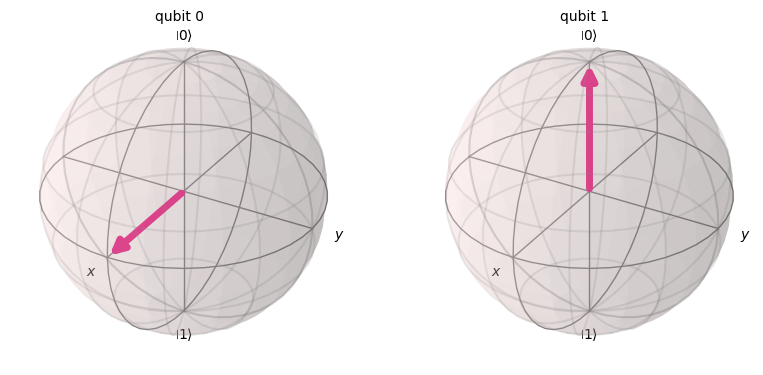

In [8]:
qc=QuantumCircuit(1)
qc.h(0)
vec=v1.evolve(qc)
print(vec.data)
plot_bloch_multivector(vec.data)

[ 0.70710678-8.65956056e-17j -0.70710678+8.65956056e-17j]


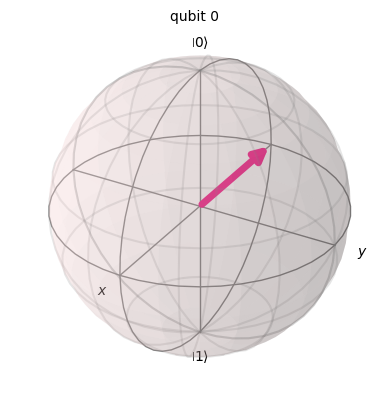

In [11]:
qc=QuantumCircuit(1)
# ~~~~~ YOUR H CODE HERE
qc.u(np.pi/2, 0, np.pi, 0)
# ~~~~~

vec=v1.evolve(qc)
print(vec.data)
plot_bloch_multivector(vec.data)

<font color=green> Compare to Z </font>

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


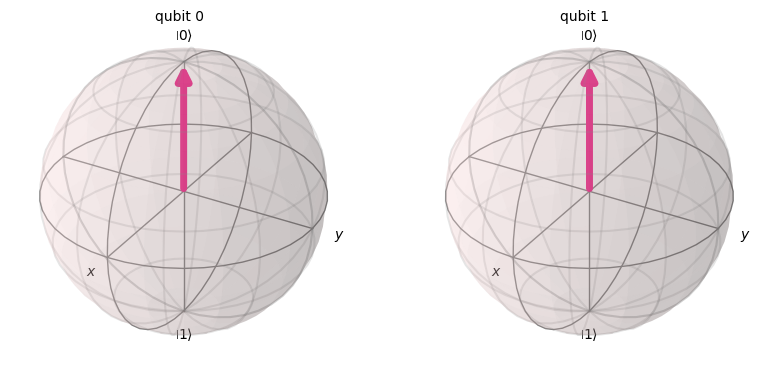

In [9]:
qc=QuantumCircuit(1)
qc.z(0)
vec=v1.evolve(qc)
print(vec.data)
plot_bloch_multivector(vec.data)

[ 0.+0.0000000e+00j -1.+1.2246468e-16j]


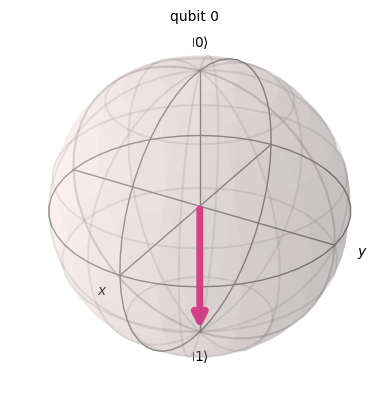

In [13]:
qc=QuantumCircuit(1)
# ~~~~~ YOUR Z CODE HERE
qc.u(0, 0, np.pi, 0)

vec=v1.evolve(qc)
print(vec.data)
plot_bloch_multivector(vec.data)

### Alternative state preparation

[0.+0.j 1.+0.j]


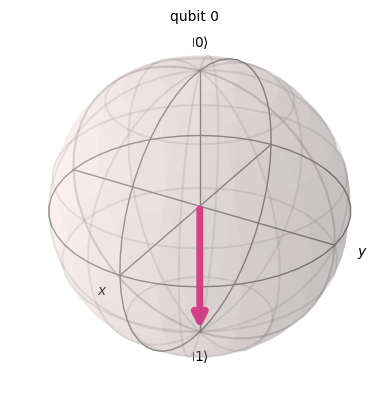

In [14]:
#We have already seen the from_label method
#v1=Statevector.from_label('1')
#print(v1.data)
#plot_bloch_multivector(v1.data)

#Now try the from_instruction method
qc=QuantumCircuit(1)
qc.x(0)
v1=Statevector.from_instruction(qc)
print(v1.data)
plot_bloch_multivector(v1.data)

## Two-Qubit Operations

An old friend:
$$\text{qc.cx}(\text{q[1],q[0]}) = \mathbf{C}_{10}$$

But there are plenty of others.

$$\begin{vmatrix}
\text{qc.cx}(\text{q[1],q[0]}) & & \mathbf{C}_{10}|x,y\rangle\qquad=&|x,x\oplus y\rangle\\
\text{qc.cy}(\text{q[1],q[0]}) & & \mathbf{C}^{\mathbf{Y}}_{10}|x,y\rangle\qquad=&i(-1)^{xy}|x,x\oplus y\rangle \\
\text{qc.cz}(\text{q[1],q[0]}) & & \mathbf{C}^{\mathbf{Z}}_{10}|x,y\rangle\qquad=&(-1)^{xy}|x,y\rangle \\
\text{qc.ch}(\text{q[1],q[0]}) & & \mathbf{C}^{\mathbf{H}}_{10}|x,y\rangle\qquad=&|x\rangle\otimes\mathbf{H}^{x}|y\rangle \\
\text{qc.crz}(\lambda,\text{q[1],q[0]}) & & \mathbf{C}^{\mathbf{U}(0,0,\lambda)}_{10}|x,y\rangle\quad=&e^{ixy\lambda}|x,y\rangle \\
\text{qc.cu1}(\lambda,\text{q[1],q[0]}) & & \mathbf{C}^{\mathbf{U}(0,0,\lambda)}_{10}|x,y\rangle\quad=&e^{ixy\lambda}|x,y\rangle \\
\text{qc.cu3}(\theta,\phi,\lambda,\text{q[1],q[0]}) & & \mathbf{C}^{\mathbf{U}(\theta,\phi,\lambda)}_{10}|x,y\rangle\quad=&|x\rangle\otimes\mathbf{U}(\theta,\phi,\lambda)^{x}|y\rangle \\
\text{qc.swap(q[1],q[0])} & & \mathbf{SWAP}|x,y\rangle\quad=&|y,x\rangle
\end{vmatrix}$$

Note that, like the single-qubit gates before, some of the above gates are deprecated and have been replaced.

$$\begin{vmatrix}
\text{qc.cp}(\lambda,\text{q[1],q[0]}) & & \mathbf{C}^{\mathbf{U}(0,0,\lambda)}_{10}|x,y\rangle\quad=&e^{ixy\lambda}|x,y\rangle \\
\text{qc.cu}(\theta,\phi,\lambda,\gamma,\text{q[1],q[0]}) & & \mathbf{C}^{e^{i\gamma}\mathbf{U}(\theta,\phi,\lambda)}_{10}|x,y\rangle\quad=&|x\rangle\otimes\left(e^{i\gamma}\mathbf{U}(\theta,\phi,\lambda)\right)^{x}|y\rangle
\end{vmatrix}$$

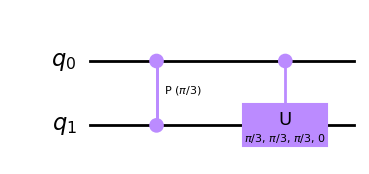

In [15]:
qc=QuantumCircuit(2)
qc.cp(np.pi/3,1,0)
qc.cu(np.pi/3,np.pi/3,np.pi/3,0,0,1)
qc.draw('mpl')

As in the single-qubit case, many of these named multi-qubit gates are implemented as combinations of more primitive gates.

We will next work to understand how to combine members of a small gate-set to create a richer set of gates.

### Building a Controlled Z Gate

We have seen in the past that a **Z** gate can be created by sandwiching an **X** between two Hadamards and vice versa.

$$\mathbf{Z}=\mathbf{HXH}\qquad \qquad \mathbf{X}=\mathbf{HZH}$$

We can similarly change between these gates' controlled forms.

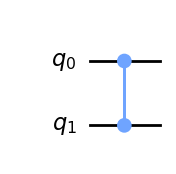

In [16]:
qcz = QuantumCircuit(2)
qcz.cz(1,0)
qcz.draw('mpl')

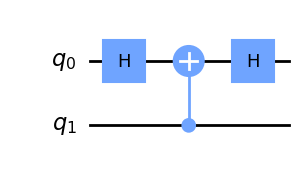

In [17]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(1,0)
qc.h(0)
qc.draw('mpl')

When the control bit is **0**, the two **H** cancel one another out.

When the control bit is **1**, the **HXH=Z** gate is implemented.

### Building a Controlled **S** Gate

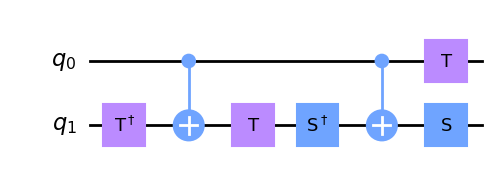

In [18]:
qcs = QuantumCircuit(2)
qcs.tdg(1)
qcs.cx(0,1)
qcs.t(1)
qcs.sdg(1)
qcs.cx(0,1)
qcs.s(1)
qcs.t(0)

qcs.draw('mpl')

$\text{The above circuit implements }\mathbf{C}^{\mathbf{S}}_{01}.$

$\text{q[0]}=0 : \mathbf{S}_{1}\mathbf{S}^{\dagger}_{1}\mathbf{T}_{1}\mathbf{T}^{\dagger}_{1}=\mathbf{I}_{1}$

$\text{q[0]}=1 : \mathbf{S}_{1}\mathbf{X}_{1}\mathbf{S}^{\dagger}_{1}\mathbf{T}_{1}\mathbf{X}_{1}\mathbf{T}^{\dagger}_{1}=\begin{pmatrix} e^{-i\pi/4} & 0 \\ 0 & e^{i\pi/4} \end{pmatrix} =e^{-i\pi/4}\begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi/2} \end{pmatrix} = e^{-i\pi/4}\mathbf{S}_{1}$

And then the final $\mathbf{T}_{0}$ gate cancels the remaining relative phase.

In this case we can also use a pre-built controlled rotation around the Z axis.

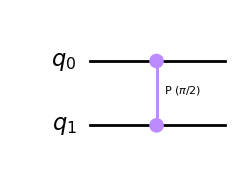

In [19]:
qcs = QuantumCircuit(2)
qcs.cp(np.pi/2,0,1)
qcs.draw('mpl')

### Building a General Controlled Gate

A general controlled unitary **U** can be built with the following sequence of gates:
$\mathbf{W}_{1}^{\dagger}\mathbf{C}_{01}\mathbf{W}_{1}\mathbf{V}_{1}^{\dagger}\mathbf{C}_{01}\mathbf{V}_{1}\mathbf{E}_{0}$

Where

$$\mathbf{V} = \begin{pmatrix} \cos\frac{\theta}{4} & -\sin\frac{\theta}{4} \\ e^{i\phi}\sin\frac{\theta}{4} & e^{i\phi}\cos\frac{\theta}{4} \end{pmatrix} \qquad \mathbf{W} = \begin{pmatrix} 1 & 0 \\ 0 & e^{i(\phi-\lambda)/2} \end{pmatrix} \qquad \mathbf{E} = \begin{pmatrix} 1 & 0 \\ 0 & e^{i(\phi+\lambda)/2} \end{pmatrix}$$

When $\text{q[0]}=0\;$ the gates act as $ \mathbf{V}_{1}\mathbf{V}^{\dagger}_{1}\mathbf{W}_{1}\mathbf{W}^{\dagger}_{1}=\mathbf{I}_{1}$

When $\text{q[0]}=1\;$ the gates act as $\mathbf{V}_{1}\mathbf{X}_{1}\mathbf{V}^{\dagger}_{1}\mathbf{W}_{1}\mathbf{X}_{1}\mathbf{W}^{\dagger}_{1}=e^{-i\alpha}\mathbf{U}_{1}=e^{-i\alpha}\begin{pmatrix} \cos\frac{\theta}{2} & -e^{i\lambda} \sin\frac{\theta}{2} \\ e^{i\phi} \sin\frac{\theta}{2} & e^{i(\lambda+\phi)} \cos\frac{\theta}{2} \end{pmatrix}$

With the final $\mathbf{E}_{0}$ gate taking care of the phase.

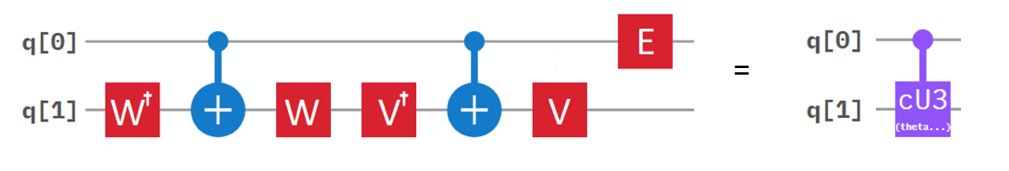

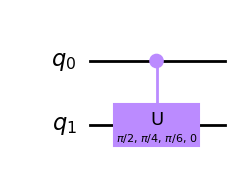

In [20]:
qc3 = QuantumCircuit(2)
qc3.cu(np.pi/2,np.pi/4,np.pi/6,0,0,1)
qc3.draw('mpl')

### <font color=green> Exercise: Build a Controlled H Gate </font>

$\text{Find the }\mathbf{V},\mathbf{V}^{\dagger},\mathbf{W},\mathbf{W}^{\dagger},\text{ and }\mathbf{E}\text{ for }\mathbf{C}^{\mathbf{H}}_{01}.$
Implement them below and compare to the built-in function.

$\text{Recall that }\mathbf{H}=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} = \mathbf{U}(\frac{\pi}{2},0,\pi) $

[0.        +0.j 0.70710678+0.j 0.        +0.j 0.70710678+0.j]


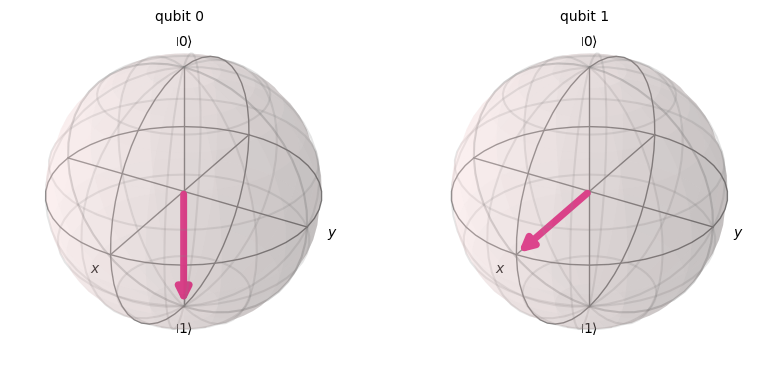

In [21]:
#Preparing for comparison
v01=Statevector.from_label('01')
qc=QuantumCircuit(2)
qc.ch(0,1)
#qc.cu(np.pi/2,0,np.pi,0,0,1)
vec=v01.evolve(qc)
print(vec.data)
plot_bloch_multivector(vec.data)

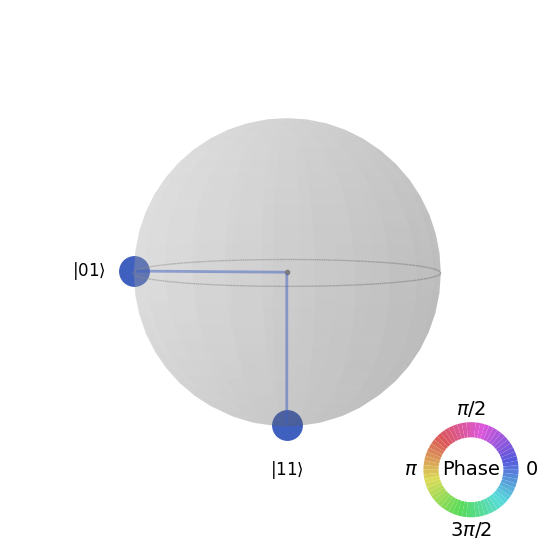

In [22]:
plot_state_qsphere(vec.data)

$$\mathbf{U} = \begin{pmatrix} \cos\frac{\theta}{2} & -e^{i\lambda} \sin\frac{\theta}{2} \\ e^{i\phi} \sin\frac{\theta}{2} & e^{i(\lambda+\phi)} \cos\frac{\theta}{2} \end{pmatrix} \qquad \theta \in [0,\pi] \quad \phi,\lambda \in [0,2\pi)$$


A general controlled unitary **U** can be built with the following sequence of gates:
$\mathbf{W}_{1}^{\dagger}\mathbf{C}_{01}\mathbf{W}_{1}\mathbf{V}_{1}^{\dagger}\mathbf{C}_{01}\mathbf{V}_{1}\mathbf{E}_{0}$

Where

$$\mathbf{V} = \begin{pmatrix} \cos\frac{\theta}{4} & -\sin\frac{\theta}{4} \\ e^{i\phi}\sin\frac{\theta}{4} & e^{i\phi}\cos\frac{\theta}{4} \end{pmatrix} \qquad \mathbf{W} = \begin{pmatrix} 1 & 0 \\ 0 & e^{i(\phi-\lambda)/2} \end{pmatrix} \qquad \mathbf{E} = \begin{pmatrix} 1 & 0 \\ 0 & e^{i(\phi+\lambda)/2} \end{pmatrix}$$

[0.00000000e+00+0.00000000e+00j 7.07106781e-01-7.07106781e-01j
 0.00000000e+00+0.00000000e+00j 1.54557485e-17-8.07429237e-18j]


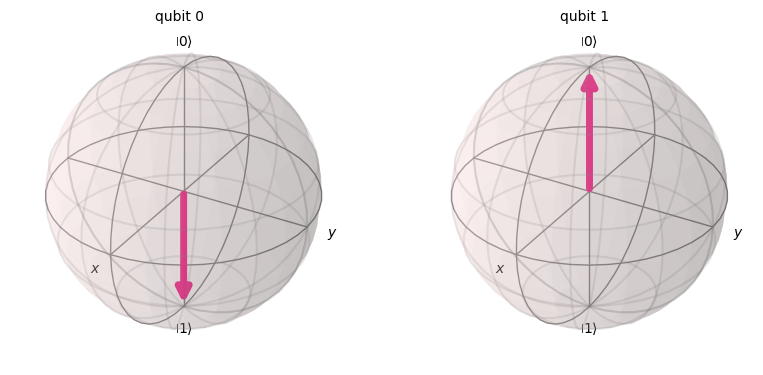

In [23]:
v01=Statevector.from_label('01')
qc=QuantumCircuit(2)
#~~~~YOUR CH CODE HERE
#qc.cu(np.pi/2,0,np.pi,0,0,1)
# V = u(np.pi/4, 0, 0, 1)
# W = u(0, -np.pi/2, 0, 1)
# E = u(0, np.pi/2, 0 , 1)
# Vdg = u(np.pi/4, 0, 0, 1)
# Wdg = u(0, np.pi/2, 0, 1)

qc.u(0, np.pi/4, 0, 1)
qc.cx(0, 1)
qc.u(0, -np.pi/4, 0, 1)

qc.u(np.pi/4, 0, 0, 1)
qc.cx(0, 1)
qc.u(np.pi/4, 0, 0, 1)

qc.u(0, np.pi/2, 0 , 1)

#~~~~

vec=v01.evolve(qc)
print(vec.data)
plot_bloch_multivector(vec.data)

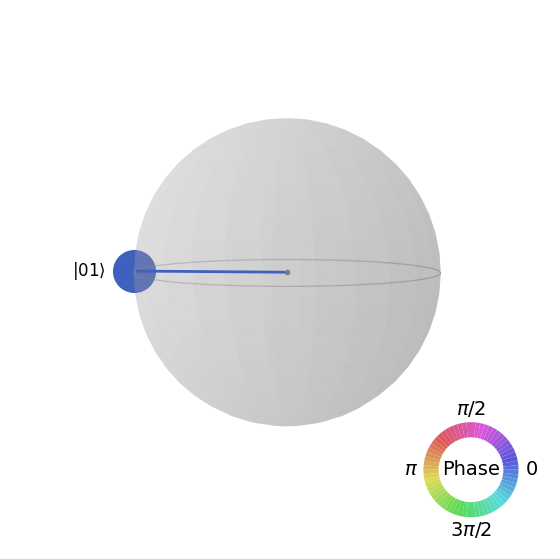

In [24]:
plot_state_qsphere(vec.data)

## Three-Qubit Operations

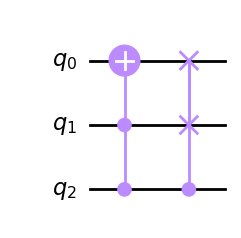

In [25]:
qc=QuantumCircuit(3)
qc.ccx(2,1,0)
qc.cswap(2,1,0)
qc.draw('mpl')

$$\begin{align}
\text{qc.ccx(q[2],q[1],q[0])}\qquad \mathbf{C}_{210}|x,y,z\rangle &= |x,y,xy\oplus z\rangle \\
\text{qc.cswap(q[2],q[1],q[0])}\qquad \mathbf{F}_{210}|x,y,z\rangle &= |x\rangle\otimes\mathbf{SWAP}^{x}|y,z\rangle\\
&=|x,\bar{x}y\oplus xz, xy\oplus \bar{x}z\rangle
\end{align}$$

Reversible AND, OR and SWAP

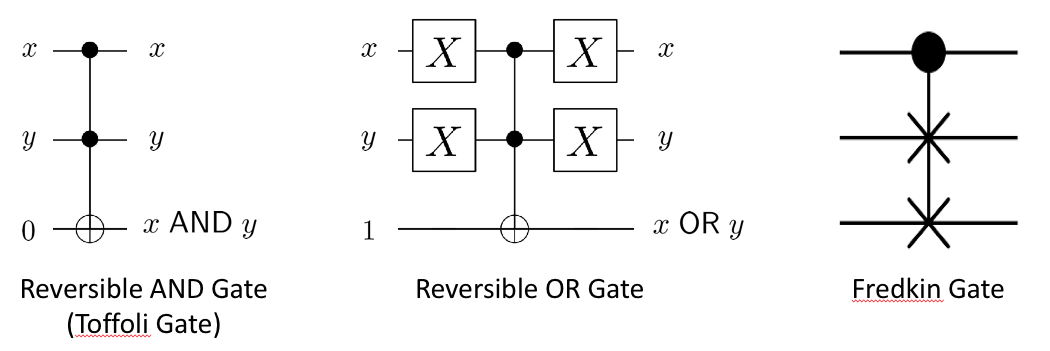

### Build a Controlled Controlled Gate

$\text{We can build a doubly controlled gate by using }\mathbf{CNOT}\text{s to selectively activate our controlled gates.}$

$\text{For a general unitary }\mathbf{U}\text{, we would implement it as }\mathbf{C}^{\mathbf{U}}_{012}=\mathbf{C}^{\sqrt{\mathbf{U}}}_{02}\mathbf{C}_{01}\mathbf{C}^{\sqrt{\mathbf{U}}^{\dagger}}_{12}\mathbf{C}_{01}\mathbf{C}^{\sqrt{\mathbf{U}}}_{12}$

By drawing this configuration we can see how each input possibility results in the desired output. See the circuit diagrams below.

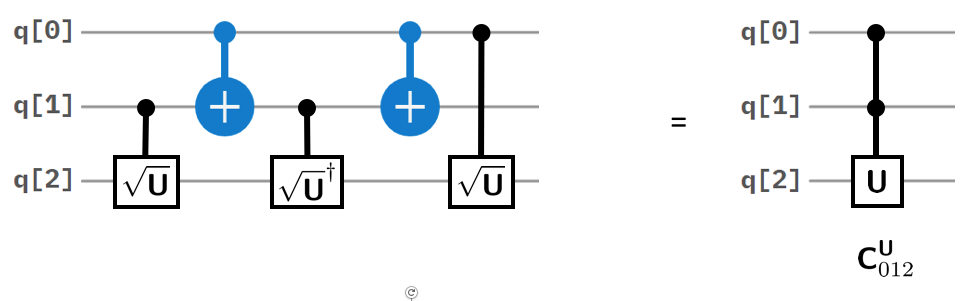

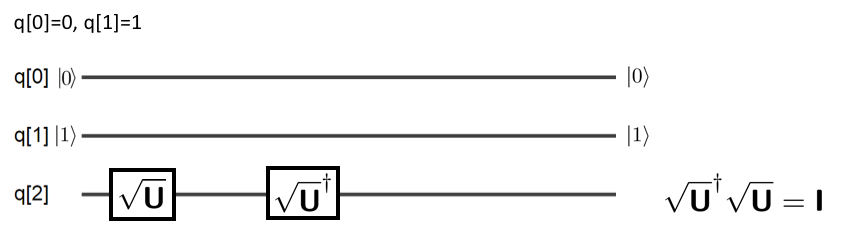

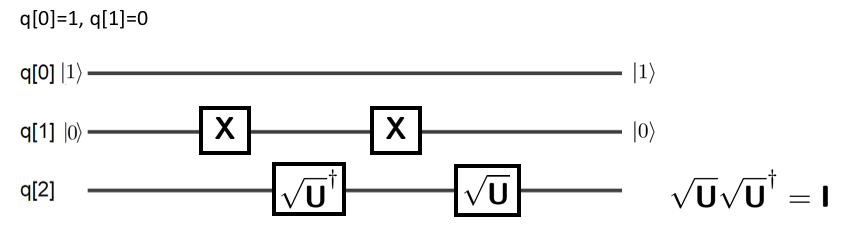

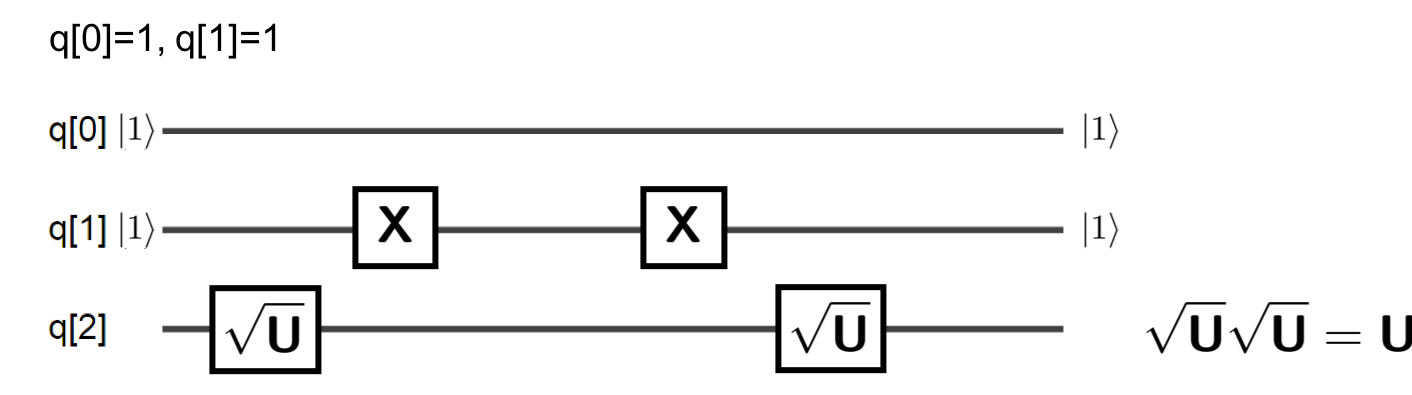

### <font color=green> Exercise: Construct Doubly Controlled Gates </font>



$\text{Use Qiskit to construct a }\mathbf{C}^{\mathbf{Z}}_{012}\text{ gate.}$

$\text{Then modify your circuit to create a }\mathbf{C}_{012}\text{ (Toffoli) gate.}$

$\text{Hint: Remember how we implemented the }\mathbf{C}^{\mathbf{S}}_{01}\text{ gate.}$

$\text{Also remember that }\sqrt{\mathbf{Z}}=\mathbf{S}.$

[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


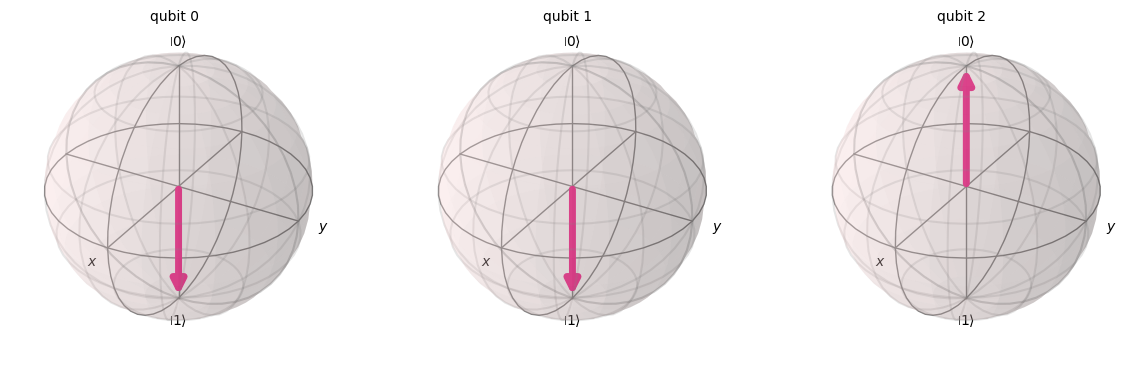

In [26]:
#Preparing for comparison
v011=Statevector.from_label('011')
print(v011.data)
plot_bloch_multivector(v011.data)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]


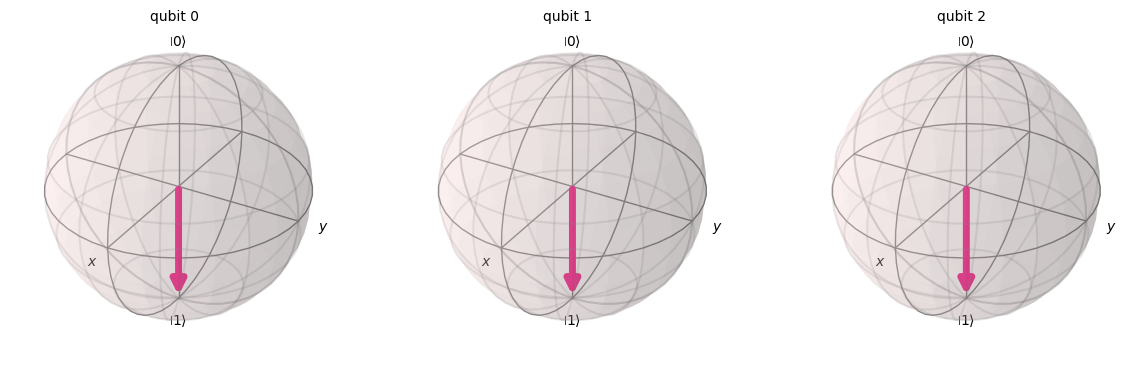

In [27]:
qc=QuantumCircuit(3)
qc.ccx(0,1,2)

vec=v011.evolve(qc)
print(vec.data)
plot_bloch_multivector(vec.data)

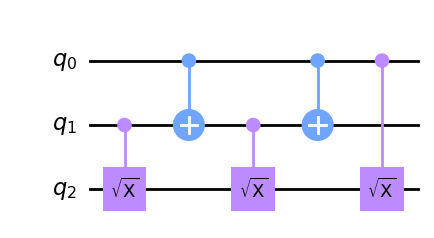

In [28]:
qc = QuantumCircuit(3)
#~~~~YOUR CCX CODE HERE
# all of this makes ccz
qc.csx(1,2)
qc.cx(0,1)
qc.csx(1,2)
qc.cx(0,1)
qc.csx(0,2)

# modify to make toffoli by using csx instead of cs
#~~~~

qc.draw('mpl')

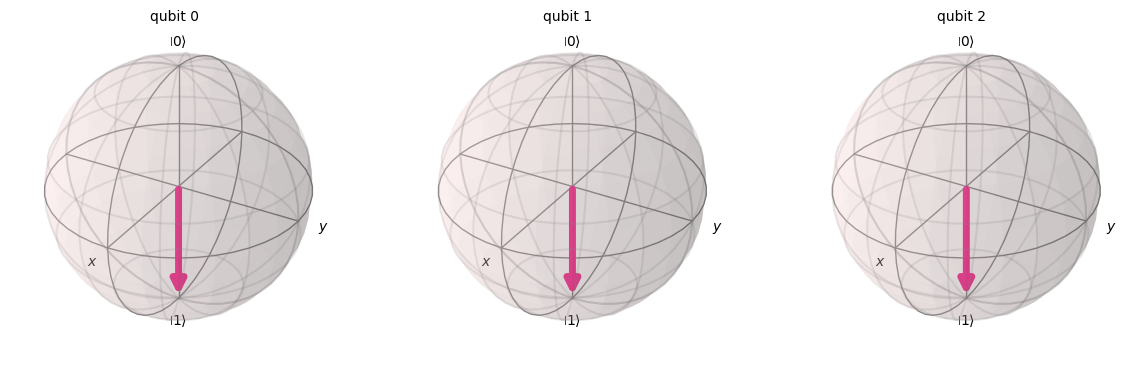

In [29]:
vec = v011.evolve(qc)
plot_bloch_multivector(vec.data)

### Controlled Controlled Controlled ... Gates

The pattern above for doubly controlled gates can be generalized to an arbitrary number of controls.

$\text{For some unitary,  }\mathbf{C}^{\mathbf{U}}_{0123}=\mathbf{C}^{\sqrt{\mathbf{U}}}_{013}\mathbf{C}_{012}\mathbf{C}^{\sqrt{\mathbf{U}}^{\dagger}}_{23}\mathbf{C}_{012}\mathbf{C}^{\sqrt{\mathbf{U}}}_{23}
$
* Barenco et al., “Elementary gates for quantum computation,” Physical Review A vol. 52, pp. 3457 - 3467

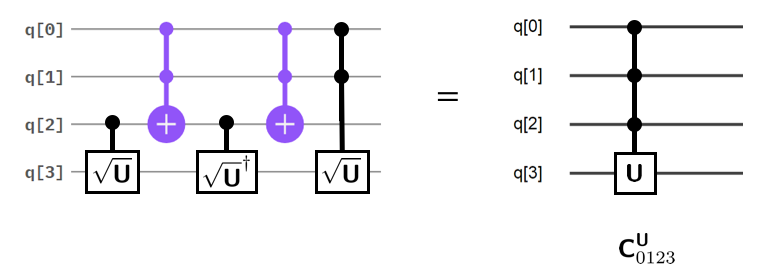

$\text{For a general unitary }\mathbf{U}\text{, we would implement it as }\mathbf{C}^{\mathbf{U}}_{012}=\mathbf{C}^{\sqrt{\mathbf{U}}}_{02}\mathbf{C}_{01}\mathbf{C}^{\sqrt{\mathbf{U}}^{\dagger}}_{12}\mathbf{C}_{01}\mathbf{C}^{\sqrt{\mathbf{U}}}_{12}$

$\text{For some unitary,  }\mathbf{C}^{\mathbf{U}}_{0123}=\mathbf{C}^{\sqrt{\mathbf{U}}}_{013}\mathbf{C}_{012}\mathbf{C}^{\sqrt{\mathbf{U}}^{\dagger}}_{23}\mathbf{C}_{012}\mathbf{C}^{\sqrt{\mathbf{U}}}_{23}
$

And so on

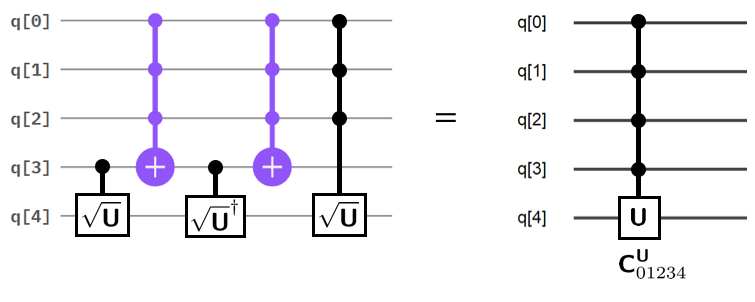